<a href="https://colab.research.google.com/github/Gauri-44/FDS-LAB-PRACTICALS-/blob/main/Gauri_V_Korgaonkar_Fds_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U scikit-fuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz # After installing, you should be able to import it.
from sklearn.manifold import TSNE # Correcting the typo in module name: TSN should be TSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.5 MB/s eta 0:00:00


In [5]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
X = data['data']

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])

# Now you can use head()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
 ### K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

Text(0.5, 1.0, 'K-Means Clustering')

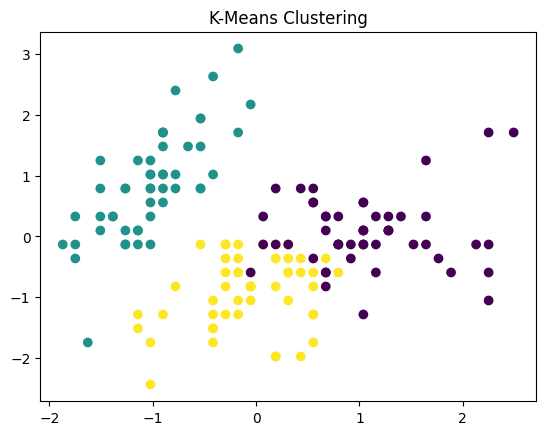

In [8]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('K-Means Clustering')


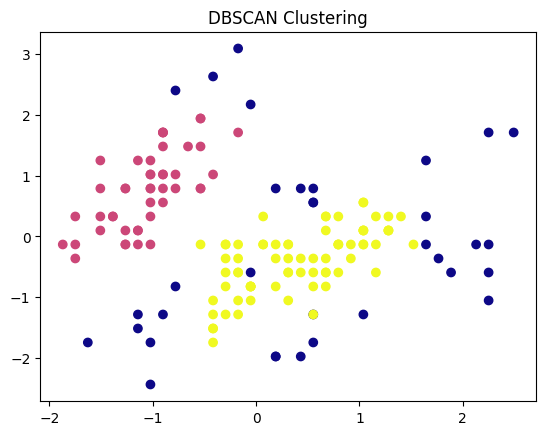

In [10]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN Clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap= 'plasma')
plt.title('DBSCAN Clustering')
plt.show()

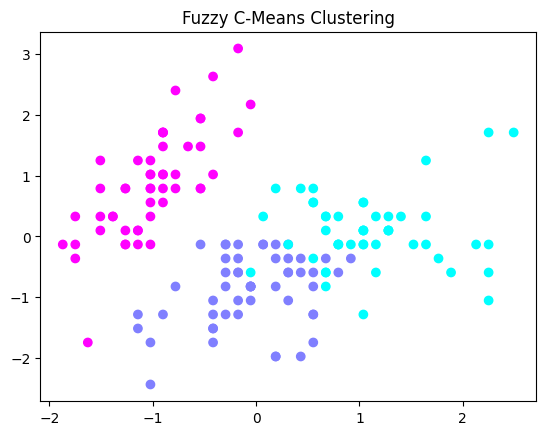

In [12]:
 ### Fuzzy Clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scaled.T, 3, 2, error=0.005, maxiter=1000)
labels_fuzzy = np.argmax(u, axis=0)
# Visualize Fuzzy Clustering
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_fuzzy, cmap= 'cool')
plt.title('Fuzzy C-Means Clustering')
plt.show()

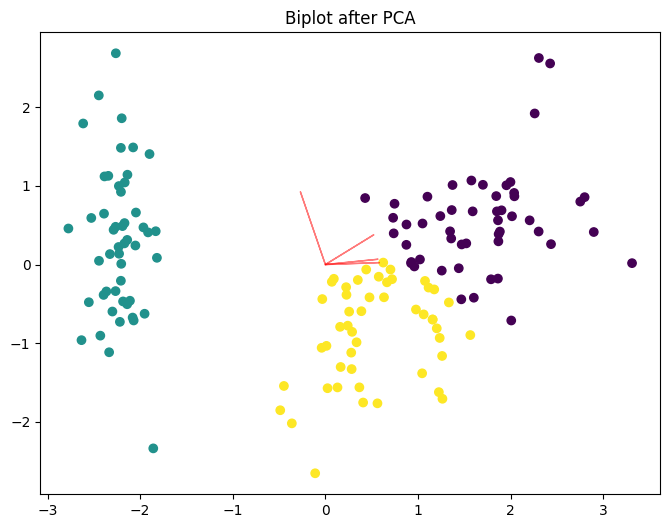

In [18]:
### PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Biplot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans,cmap= 'viridis')
for i, var in enumerate(pca.components_.T):
    plt.arrow(0, 0, var[0], var[1], color= 'r',alpha=0.5) # Indented this line
plt.title('Biplot after PCA')
plt.show() # Added parentheses to call the show function

In [19]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

<function matplotlib.pyplot.show(close=None, block=None)>

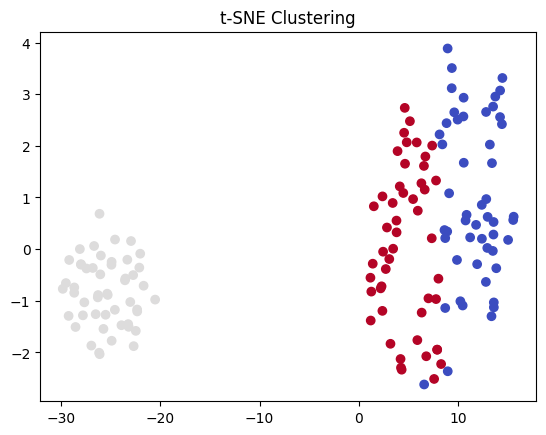

In [21]:
 # Visualize t-SNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans, cmap= 'coolwarm')
plt.title('t-SNE Clustering')
plt.show